In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

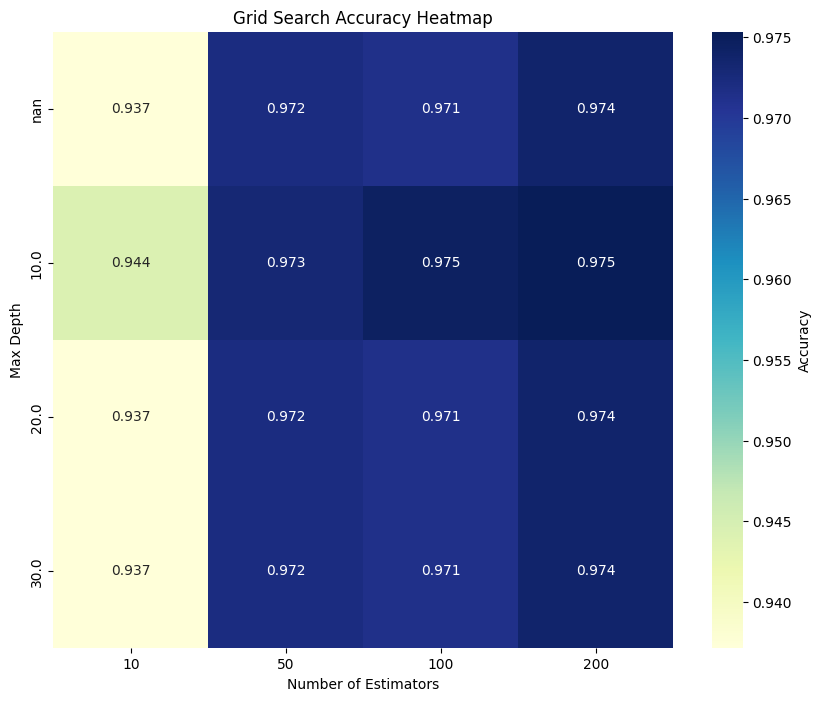

Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}
Лучший результат точности (среднее по кросс-валидации): 0.9753399102004681


In [10]:
X = digits.data
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)



# Шаг 3: Определение диапазонов гиперпараметров
n_estimators_range = [10, 50, 100, 200]
max_depth_range = [None, 10, 20, 30]

# Определение сетки гиперпараметров
param_grid = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range
}

# Создание модели
clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # метрика оценки модели
    cv=5,                # количество фолдов в кросс-валидации
    n_jobs=-1            # использование всех доступных ядер для ускорения вычислений
)

# Запуск поиска по сетке
grid_search.fit(X_train, y_train)

# Извлечение результатов
results = pd.DataFrame(grid_search.cv_results_)

# Преобразование результатов в формат для тепловой карты
heatmap_data = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.xlabel("Number of Estimators")
plt.ylabel("Max Depth")
plt.title("Grid Search Accuracy Heatmap")
plt.show()

# Лучшие параметры и точность
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший результат точности (среднее по кросс-валидации):", best_score)

In [12]:
# Шаг 3: Определение диапазонов гиперпараметров
n_estimators_range = [10, 50, 100, 200]
max_depth_range = [None, 10, 20, 30]
min_samples_split_range = [2, 5, 10]
min_samples_leaf_range = [1, 2, 4]

clf = RandomForestClassifier(random_state=42, n_jobs=-1)
paramGrid = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range,
}

gridSearch = GridSearchCV(estimator=clf,
                            param_grid=paramGrid,
                            n_jobs=-1,
                            scoring='accuracy',
                            )

gridSearch.fit(X_train,y_train)
results=pd.DataFrame(gridSearch.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034905,0.003658,0.028356,0.005381,None,1,2,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.924603,0.936508,0.960159,0.936255,0.928287,0.937162,0.012382,124
1,0.085227,0.006109,0.030863,0.006859,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.972222,0.980159,0.980080,0.960159,0.968127,0.972149,0.007576,29
2,0.151294,0.008109,0.028072,0.004260,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.972222,0.972222,0.980080,0.968127,0.964143,0.971359,0.005292,40
3,0.305403,0.032628,0.039728,0.010006,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.984127,0.976190,0.980080,0.968127,0.960159,0.973737,0.008603,11
4,0.041719,0.024809,0.034200,0.021890,None,1,5,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.956349,0.936508,0.960159,0.948207,0.928287,0.945902,0.011969,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.279562,0.027741,0.034464,0.005379,30,4,5,200,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.960317,0.964286,0.976096,0.968127,0.960159,0.965797,0.005926,70
140,0.025435,0.006762,0.029928,0.011054,30,4,10,10,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.932540,0.936508,0.920319,0.932271,0.944223,0.933172,0.007742,131
141,0.103243,0.030482,0.025619,0.005441,30,4,10,50,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.952381,0.964286,0.968127,0.956175,0.952191,0.958632,0.006461,104
142,0.160130,0.061553,0.021321,0.003305,30,4,10,100,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.960317,0.960317,0.968127,0.968127,0.964143,0.964207,0.003493,81


In [16]:
filtered_results = results[
    (results['param_min_samples_split'] == 2) & 
    (results['param_min_samples_leaf'] == 1)
]

pivot_table = filtered_results.pivot(index="param_n_estimators", columns="param_max_depth", values="mean_test_score")

pivot_table

param_max_depth,NaN,10.0,20.0,30.0
param_n_estimators,,,,
10,0.937162,0.943518,0.937162,0.937162
50,0.972149,0.972962,0.972149,0.972149
100,0.971359,0.974540,0.971359,0.971359
200,0.973737,0.975340,0.973737,0.973737


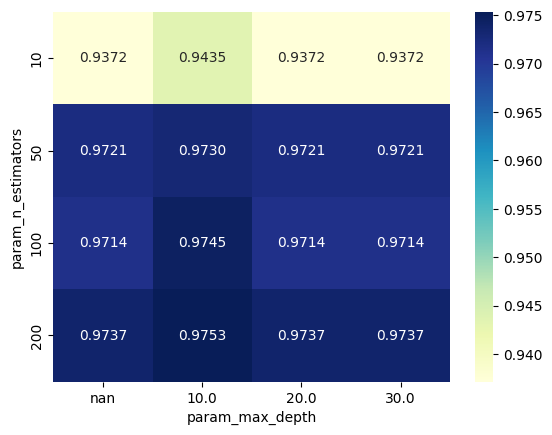

In [17]:
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap="YlGnBu")
plt.show()

In [18]:
data = pd.read_csv('population_by_zip_2010.csv')
print(data.head())

: 